C:\Users\kylef\AppData\Local\Temp\ipykernel_3564\3109561934.py:43: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\kylef\AppData\Local\Temp\ipykernel_3564\3109561934.py:46: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\kylef\AppData\Local\Temp\ipykernel_3564\3109561934.py:47: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

       age  membership_category  days_since_last_login  avg_time_spent  \
0       18                    5                     17      300.630000   
1       32                    6                     16      306.340000   
2       44                    1                     14      516.160000   
3       37                    1                     11       53.270000   
4       31                    1                     20      113.130000   
...    ...                  ...                    ...             ...   
36987   46                    2                      2     -650.682759   
36988   29                    2                     13     -638.123421   
36989   23                    2                     12      154.940000   
36990   53                    5                     15      482.610000   
36991   35                    3                     15       79.180000   

       avg_transaction_value  past_complaint  complaint_status  \
0                   53005.25               0 

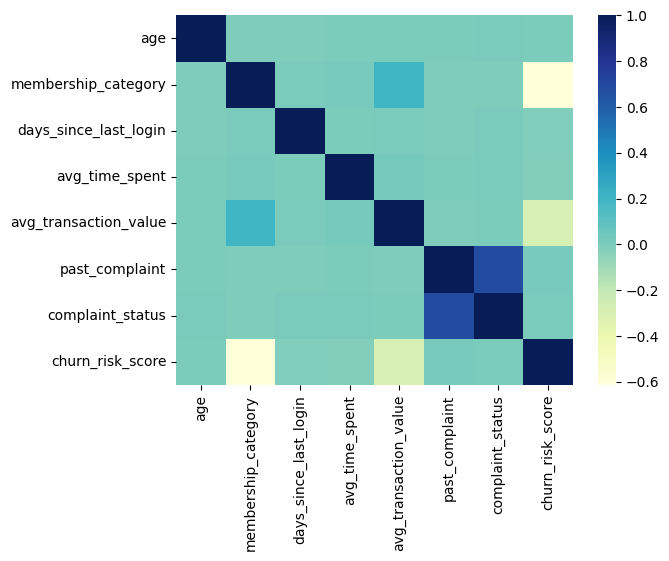

In [22]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns 

churn = pd.read_csv("train.csv")

df = pd.DataFrame(churn)

x_time_spent = df.get("avg_time_spent")
x_membership_category = df.get("membership_category")
x_feedback = df.get("feedback")

y = df.get("churn_risk_score")

# Create a scatter plot
scatter_plot = go.Scatter(x=x_time_spent, y=y)
# Create the layout
layout = go.Layout(title='Scatter Plot', xaxis=dict(title='Average Time Spent'), yaxis=dict(title='Churn Risk Score'))
# Create the figure
fig = go.Figure(data=[scatter_plot], layout=layout)
# Plot the figure
#fig.show()



#Create a box plot
fig = px.box(df, x=x_membership_category, y=y)
#fig.show()



#create a bar plot
fig = go.Figure(data=[go.Bar(x=x_feedback, y=y)])
#fig.show()




df = df.drop(["customer_id", "Name",  "gender", "security_no", "region_category", "points_in_wallet", "avg_frequency_login_days",
              "joining_date", "joined_through_referral", "referral_id", "preferred_offer_types", "medium_of_operation", 
              "internet_option", "used_special_discount", "offer_application_preference", "last_visit_time", "feedback"], axis= 1)
df['membership_category'] = df['membership_category'].replace({'No Membership': 1, 'Basic Membership': 2, 'Silver Membership': 3,
                                                                'Gold Membership': 4, 'Platinum Membership': 5, 'Premium Membership': 6})

df['past_complaint'] = df['past_complaint'].replace({'No': 0, 'Yes': 1})
df['complaint_status'] = df['complaint_status'].replace({'Not Applicable': 1, 'No Information Available': 1, 'Unsolved': 2,
                                                                'Solved in Follow-up': 3, 'Solved': 4})


print(df)






corr = df.corr()
#dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=False) 


